In [ ]:
import json

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")

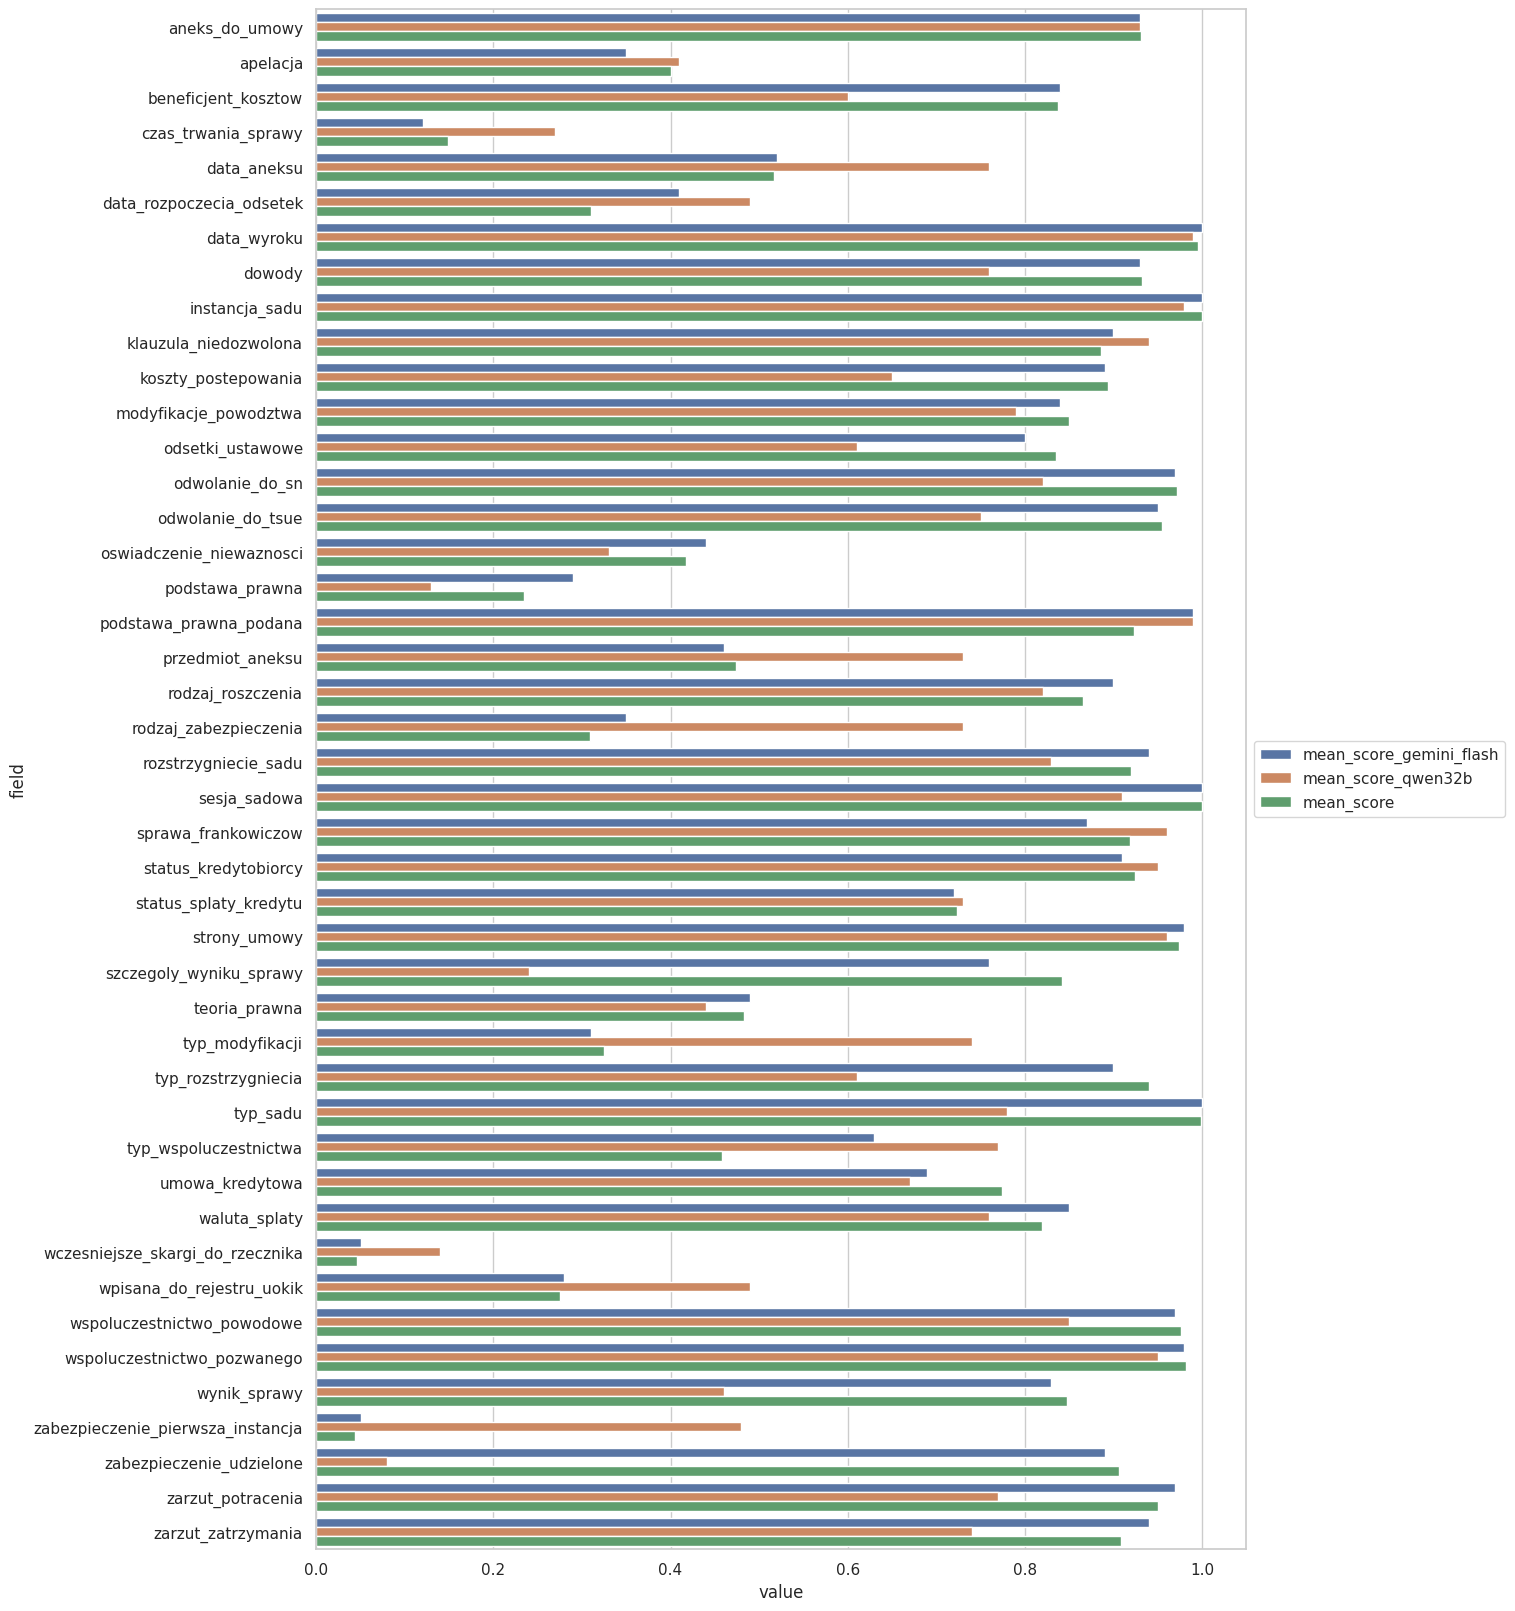

In [30]:
def load_data(path):
    with open(path) as f:
        data = json.load(f)
    aggregated_scores = []
    for key, value in data["aggregated_scores"].items():
        aggregated_scores.append({"field": key, "metric": "mean_score", "score": value["score"]["mean_score"]})
        
        # for m_name, m_value in value["score"].items():
            # aggregated_scores.append({"field": key, "metric": m_name, "score": m_value})
    return pd.DataFrame(aggregated_scores).pivot(index="field", columns="metric", values="score")


df2 = load_data("data/experiments/predict/raw_vllm/pl_court_swiss_franc_loans/annotated/qwen_3_32b/info_extraction_annotated_json_refined/swiss_franc_loans_refined/seed_42/judge_gemini-2.5-flash/scores_llm_as_judge_gemini-2.5-flash.json")
df1 = load_data("data/extraction/pl-court-swiss-franc-loans/prompt__pl-swiss-franc-loans/schema__info_extraction_annotated_json_refined_structured/llm__gemini-2.5-flash/judge_gemini-2.5-flash/scores_llm_as_judge_gemini-2.5-flash.json")
df3 = load_data("data/extraction/pl-court-swiss-franc-loans/prompt__pl-swiss-franc-loans/schema__info_extraction_annotated_json_refined_structured/llm__gemini-2.5-pro/judge_gemini-2.5-flash/scores_llm_as_judge_gemini-2.5-flash.json")

df = df1.join(df2, lsuffix="_gemini_flash", rsuffix="_qwen32b").round(2)
df = df.join(df3, rsuffix="_gemini_pro")


_, ax = plt.subplots(figsize=(12, 20))
ax = sns.barplot(data=df.reset_index().melt(id_vars="field"), y="field", x="value", hue="metric", ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [31]:
df.mean(axis=0)

metric
mean_score_gemini_flash    0.724773
mean_score_qwen32b         0.677045
mean_score                 0.721041
dtype: float64